# Aprendizagem 2024/25

## Homework I - Notebook

### ist105901 and ist106943

In [2]:
import pandas as pd, numpy as np
from scipy.io.arff import loadarff

# Reading the ARFF file
data = loadarff('diabetes.arff')
df = pd.DataFrame(data[0])
df['Outcome'] = df['Outcome'].str.decode('utf-8')


## 1)

In [3]:
from sklearn.feature_selection import f_classif

X = df.drop('Outcome', axis=1)
Y = df['Outcome']

f_statistics = f_classif(X, Y)

a = {f_statistics[0][_]:X.columns.values[_] for _ in range(f_statistics[0].size)}
print(f'The input variable with the worst discriminative power is {a[min(f_statistics[0])]} with a score of {min(f_statistics[0])}')
print(f'The input variable with the best discriminative power is {a[max(f_statistics[0])]} with a score of {max(f_statistics[0])}')

The input variable with the worst discriminative power is BloodPressure with a score of 3.256950397889028
The input variable with the best discriminative power is Glucose with a score of 213.16175217803828


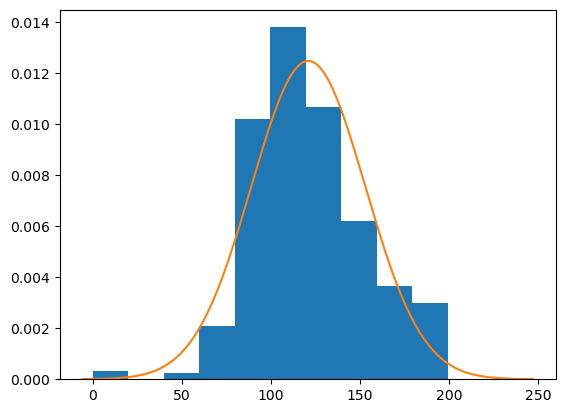

In [4]:
from matplotlib import pyplot
from scipy.stats import norm

mean = np.mean(df['Glucose'])
std_dev = np.std(df['Glucose'])
dist = norm(mean, std_dev)

values = [value for value in range(int(mean - 4*std_dev), int(mean + 4*std_dev))]
probabilities = [dist.pdf(value) for value in values]

pyplot.hist(df['Glucose'], bins=10, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

69.10546875


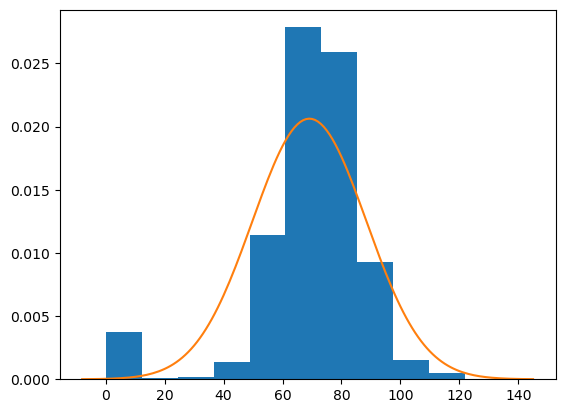

In [6]:
from matplotlib import pyplot
from scipy.stats import norm

mean = np.mean(df['BloodPressure'])
print(mean)
std_dev = np.std(df['BloodPressure'])
dist = norm(mean, std_dev)

values = [value for value in range(int(mean - 4*std_dev), int(mean + 4*std_dev))]
probabilities = [dist.pdf(value) for value in values]

pyplot.hist(df['BloodPressure'], bins=10, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

# 2)

In [ ]:
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# feature_scores = mutual_info_classif(X_train, y_train)
# sorted_features = np.argsort(feature_scores)

predictor = tree.DecisionTreeClassifier()

for m in [2, 5, 10, 20, 30, 50, 100]:

    train_accs, test_accs = [], []
    for _ in range(10):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, stratify=Y, random_state=1)

        train_m_accs, test_m_accs = [], []

        # top_features = sorted_features[-m:]
        # X_m_train, X_m_test = X_train.iloc[:,top_features], X_test.iloc[:,top_features]

        predictor.fit(X_m_train, y_train)
        train_accs.append(round(metrics.accuracy_score(Y_train, predictor.predict(X_m_train)), 2))
        test_accs.append(round(metrics.accuracy_score(Y_train, predictor.predict(X_m_test)), 2))

    train_accs.append()

In [ ]:
# ... [previous imports and data preparation] ...

num_runs = 10
min_samples_split_values = [2, 5, 10, 20, 30, 50, 100]

avg_train_accuracies = []
avg_test_accuracies = []

for min_samples in min_samples_split_values:
    run_train_accuracies = []
    run_test_accuracies = []
    
    for _ in range(num_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=None)
        
        clf = DecisionTreeClassifier(min_samples_split=min_samples, random_state=None)
        clf.fit(X_train, y_train)
        
        y_train_pred = clf.predict(X_train)
        train_acc = accuracy_score(y_train, y_train_pred)
        run_train_accuracies.append(train_acc)
        
        y_test_pred = clf.predict(X_test)
        test_acc = accuracy_score(y_test, y_test_pred)
        run_test_accuracies.append(test_acc)
    
    avg_train_accuracies.append(np.mean(run_train_accuracies))
    avg_test_accuracies.append(np.mean(run_test_accuracies))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, avg_train_accuracies, marker='o', label='Avg Training Accuracy')
plt.plot(min_samples_split_values, avg_test_accuracies, marker='o', label='Avg Testing Accuracy')
plt.xscale('log')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Average Accuracy')
plt.title('Average Decision Tree Performance vs Minimum Samples Split (10 runs)')
plt.legend()
plt.grid(True)
plt.show()

print("Average train accuracies:", avg_train_accuracies)
print("Average test accuracies:", avg_test_accuracies)